Data Mining - Kelompok 1
1. 2501974385 - Ricky Krisdianto
2. 2540128165 - Hossey Masada
3. 2540129855 - Ivana Apriani
4. 2540130365 - Celina Josephine
5. 2501984511 - Princessa Fortunata Fusanto
6. 2501977286 - Alden Ardiwinata Putra

# Post-Processing

In [ ]:
# import main library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import library for machine learning and data mining utilities
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# set pandas utility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# warnings.filterwarnings('ignore')

In [ ]:
# import and read CSV dataset and input as dataframe (df)
df = pd.read_csv('/content/Invistico_Airline.csv')

In [ ]:
# check dataset size, metadata and a brief look into dataset
print("Dataset Size:", df.shape)
print(df.info())
df.head()

Dataset Size: (129880, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight ent

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# check for missing value
df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
# eliminate missing value
df = df.dropna()
df.shape

(129487, 22)

In [ ]:
# check uniquity and any imbalance properties in dataset
print(df.nunique(), "\n")
features = df.columns

features = features.drop('Age')
features = features.drop('Flight Distance')
features = features.drop('Departure Delay in Minutes')
features = features.drop('Arrival Delay in Minutes')

for feature in features:
  print(df[(feature)].value_counts(), "\n")

satisfaction                            2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64 

satisfied       70882
dissatisfied    58605
Name: satisfactio

In [ ]:
# convert categorical feature into numerical feature
encoder = LabelEncoder()
df['satisfaction'] = encoder.fit_transform(df['satisfaction'])
df['Customer Type'] = encoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = encoder.fit_transform(df['Type of Travel'])
df['Class'] = encoder.fit_transform(df['Class'])

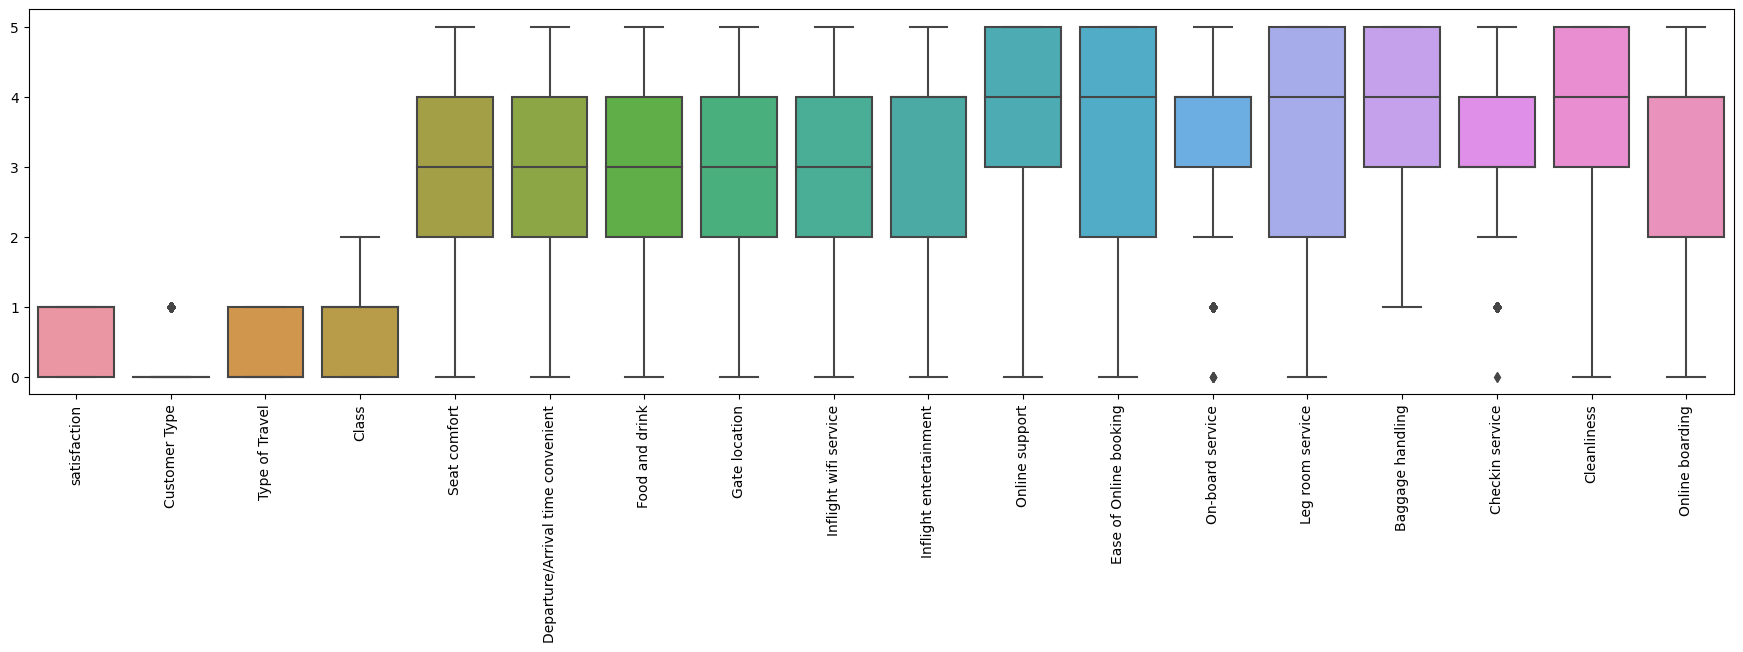

In [ ]:
# outlier analysis in dataset
plt.figure(figsize=(22,5))
db = df

db = db.drop(columns='Flight Distance')
db = db.drop(columns='Departure Delay in Minutes')
db = db.drop(columns='Arrival Delay in Minutes')
db = db.drop(columns='Age')

bp = sns.boxplot(db)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

<Axes: >

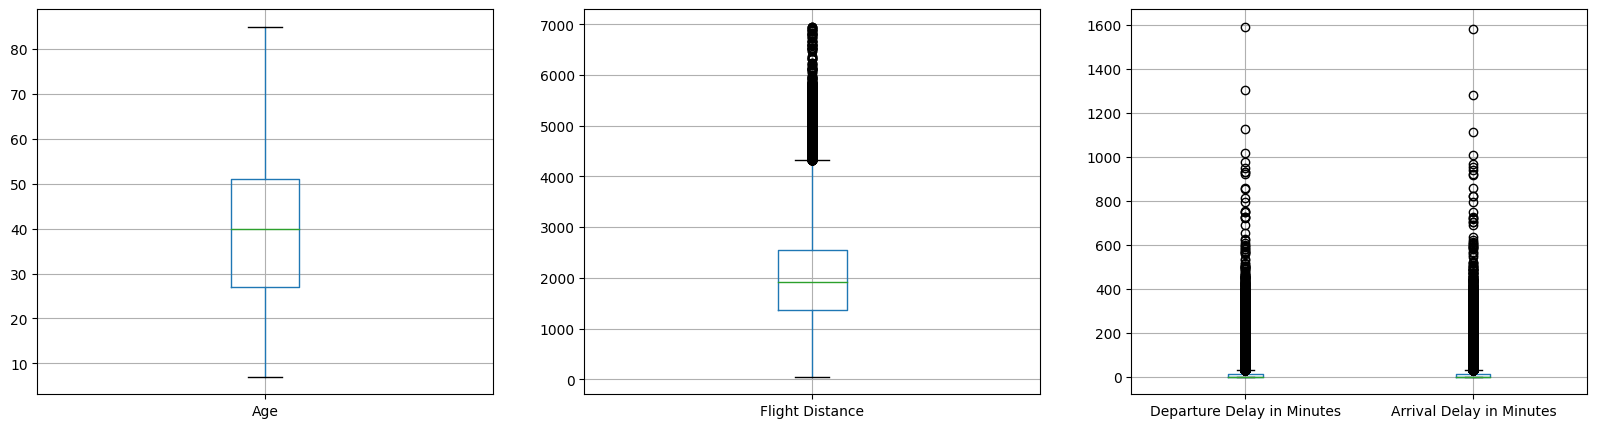

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
df[['Age']].boxplot()
plt.subplot(1, 3, 2)
df[['Flight Distance']].boxplot()
plt.subplot(1, 3, 3)
df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].boxplot()

Outlier Removal Iteration-1, (111995, 22)


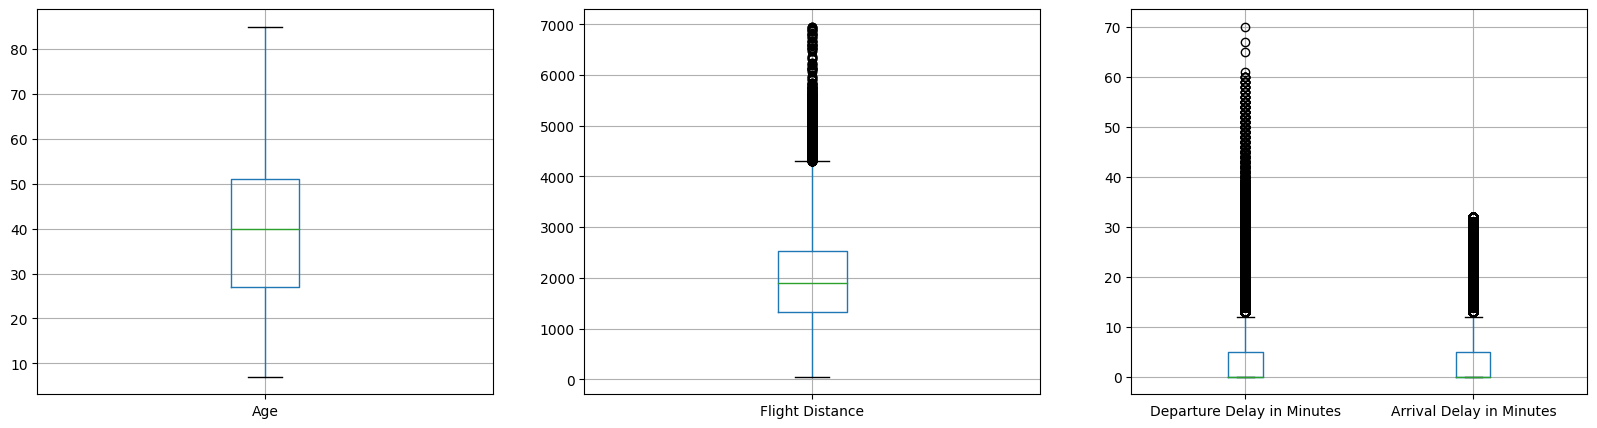

Outlier Removal Iteration-2, (96380, 22)


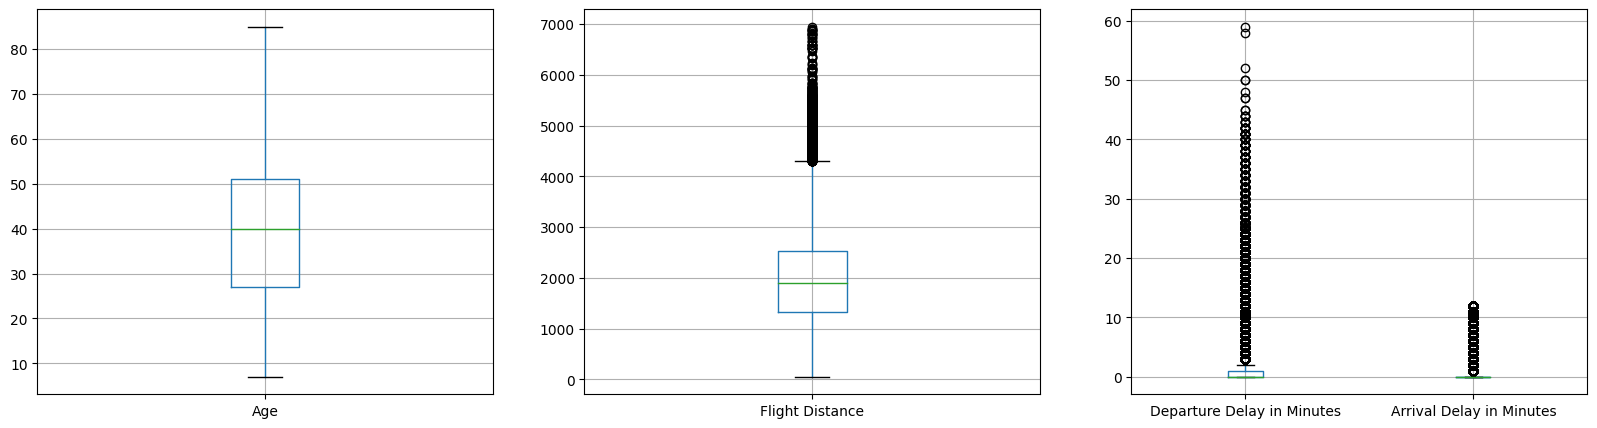

Outlier Removal Iteration-3, (72753, 22)


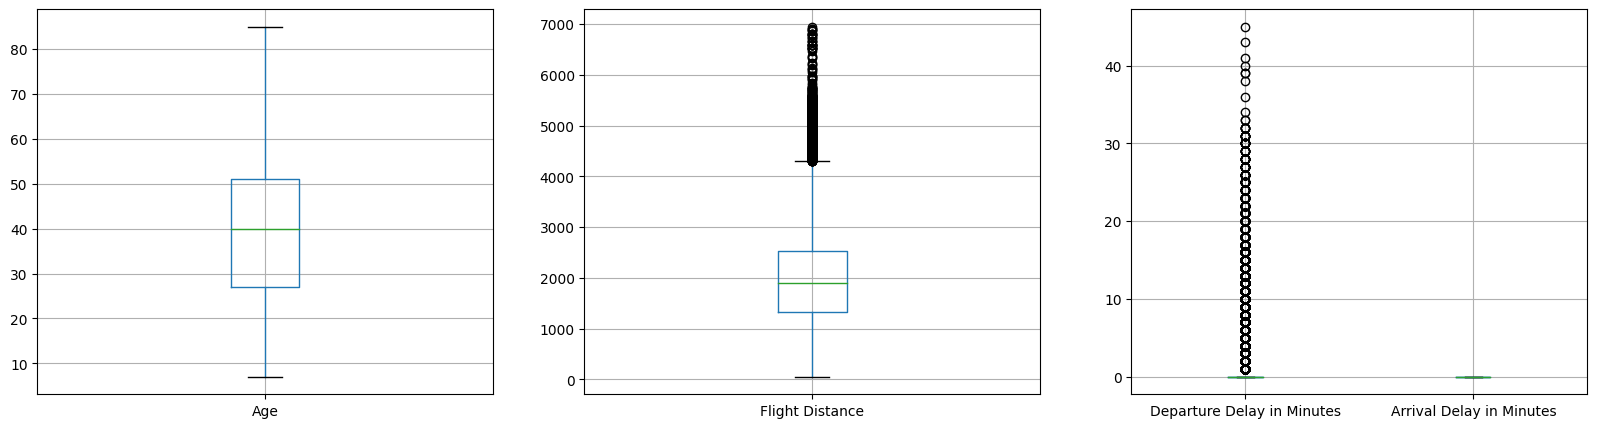

Outlier Removal Iteration-4, (72753, 22)


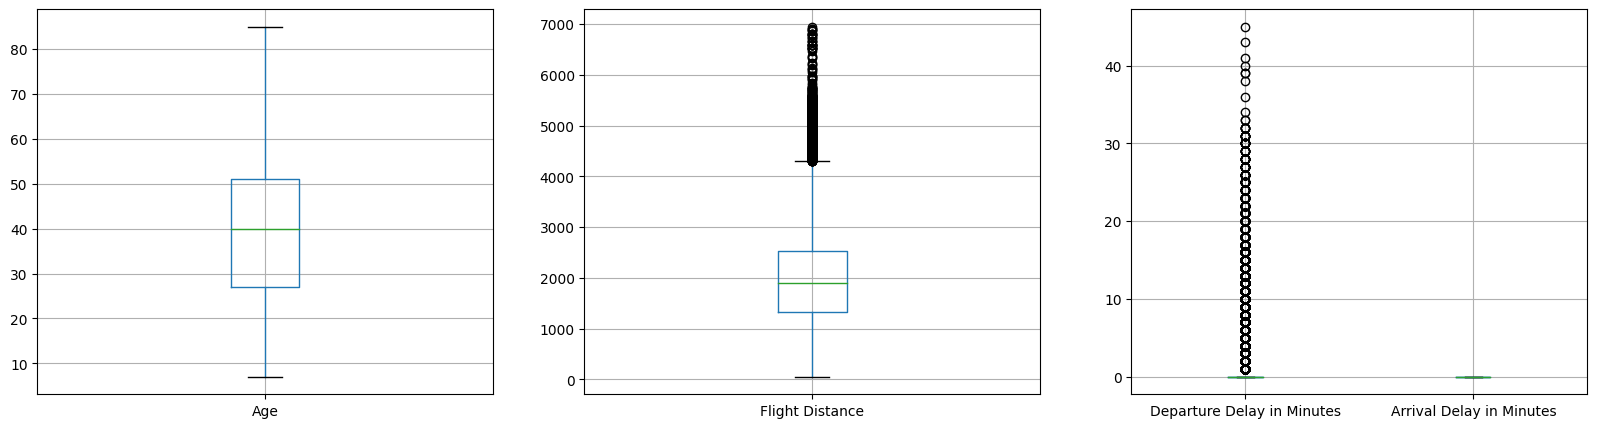

Outlier Removal Iteration-5, (72753, 22)


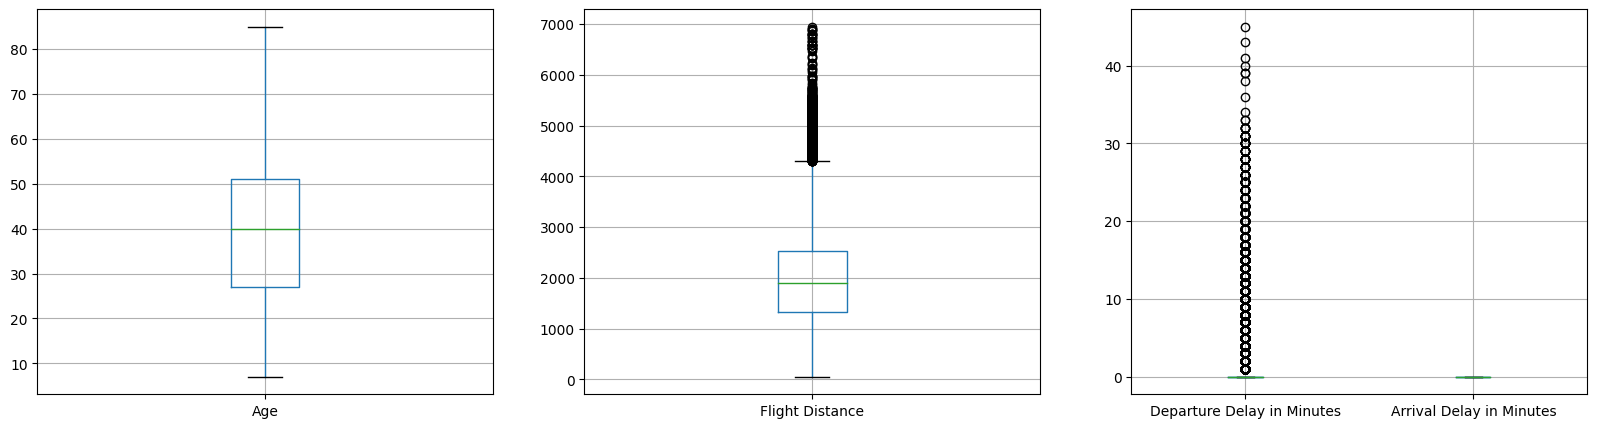

In [ ]:
for i in range(5):
  distance = 1.5 * (np.percentile(df['Arrival Delay in Minutes'], 75) - np.percentile(df['Arrival Delay in Minutes'], 25))
  df.drop(df[df['Arrival Delay in Minutes'] > distance + np.percentile(df['Arrival Delay in Minutes'], 75)].index, inplace=True)
  df.drop(df[df['Arrival Delay in Minutes'] < np.percentile(df['Arrival Delay in Minutes'], 25) - distance].index, inplace=True)

  plt.figure(figsize=(20,5))
  print(f"Outlier Removal Iteration-{i + 1}, {df.shape}")
  plt.subplot(1, 3, 1)
  df[['Age']].boxplot()
  plt.subplot(1, 3, 2)
  df[['Flight Distance']].boxplot()
  plt.subplot(1, 3, 3)
  df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].boxplot()
  plt.show()

In [ ]:
df.shape

(72753, 22)

In [ ]:
df['satisfaction'].value_counts()

1    42683
0    30070
Name: satisfaction, dtype: int64

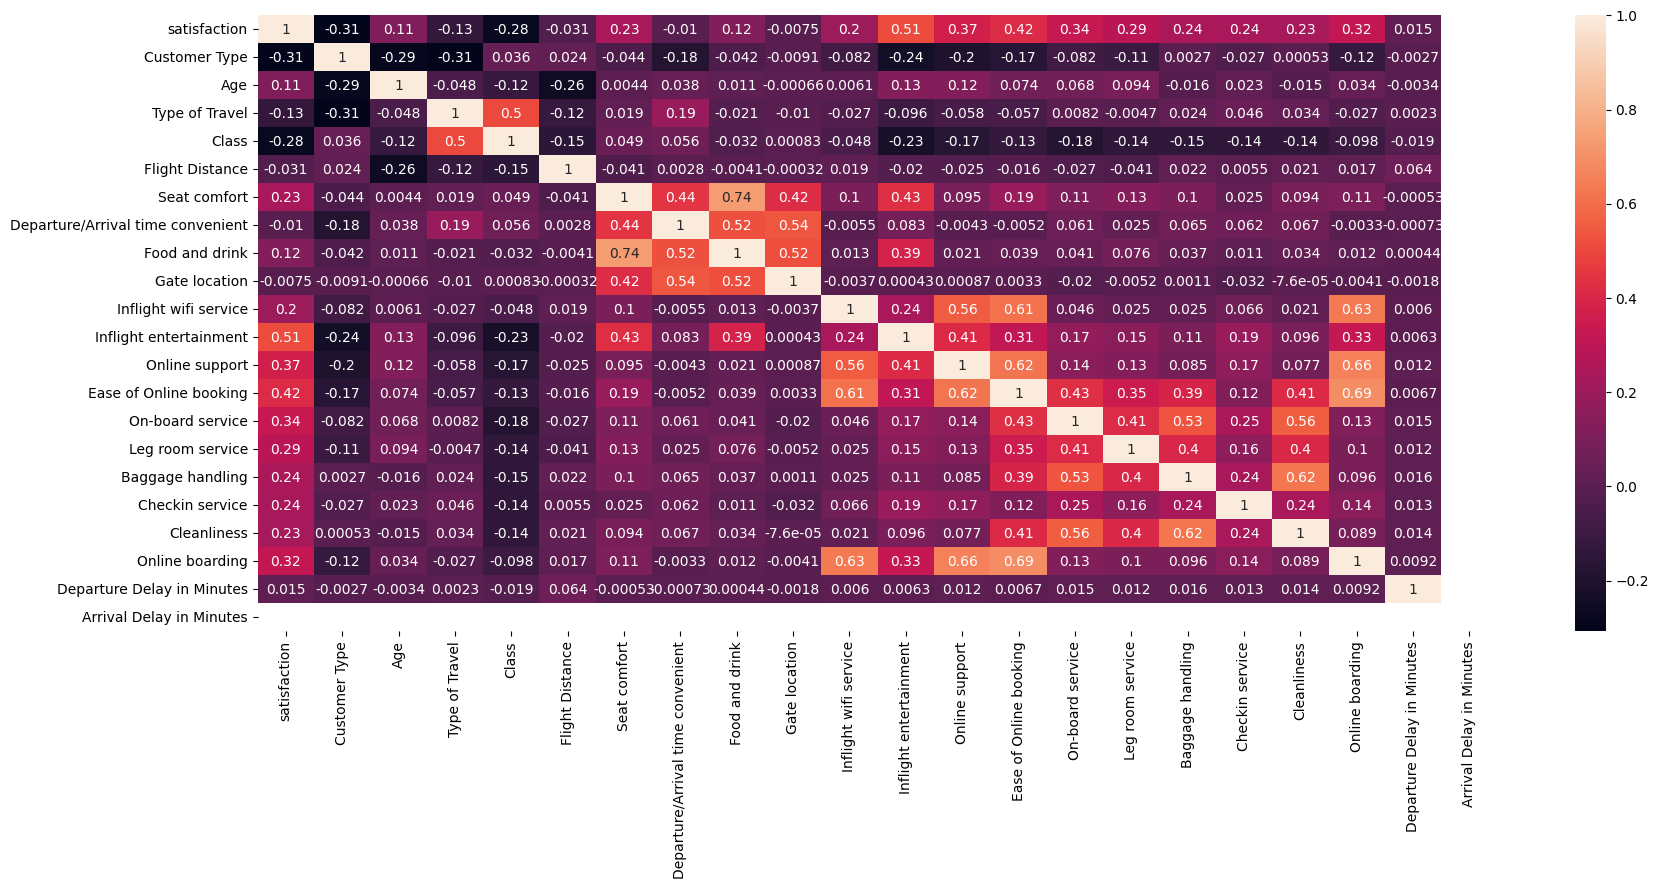

In [ ]:
# check features correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

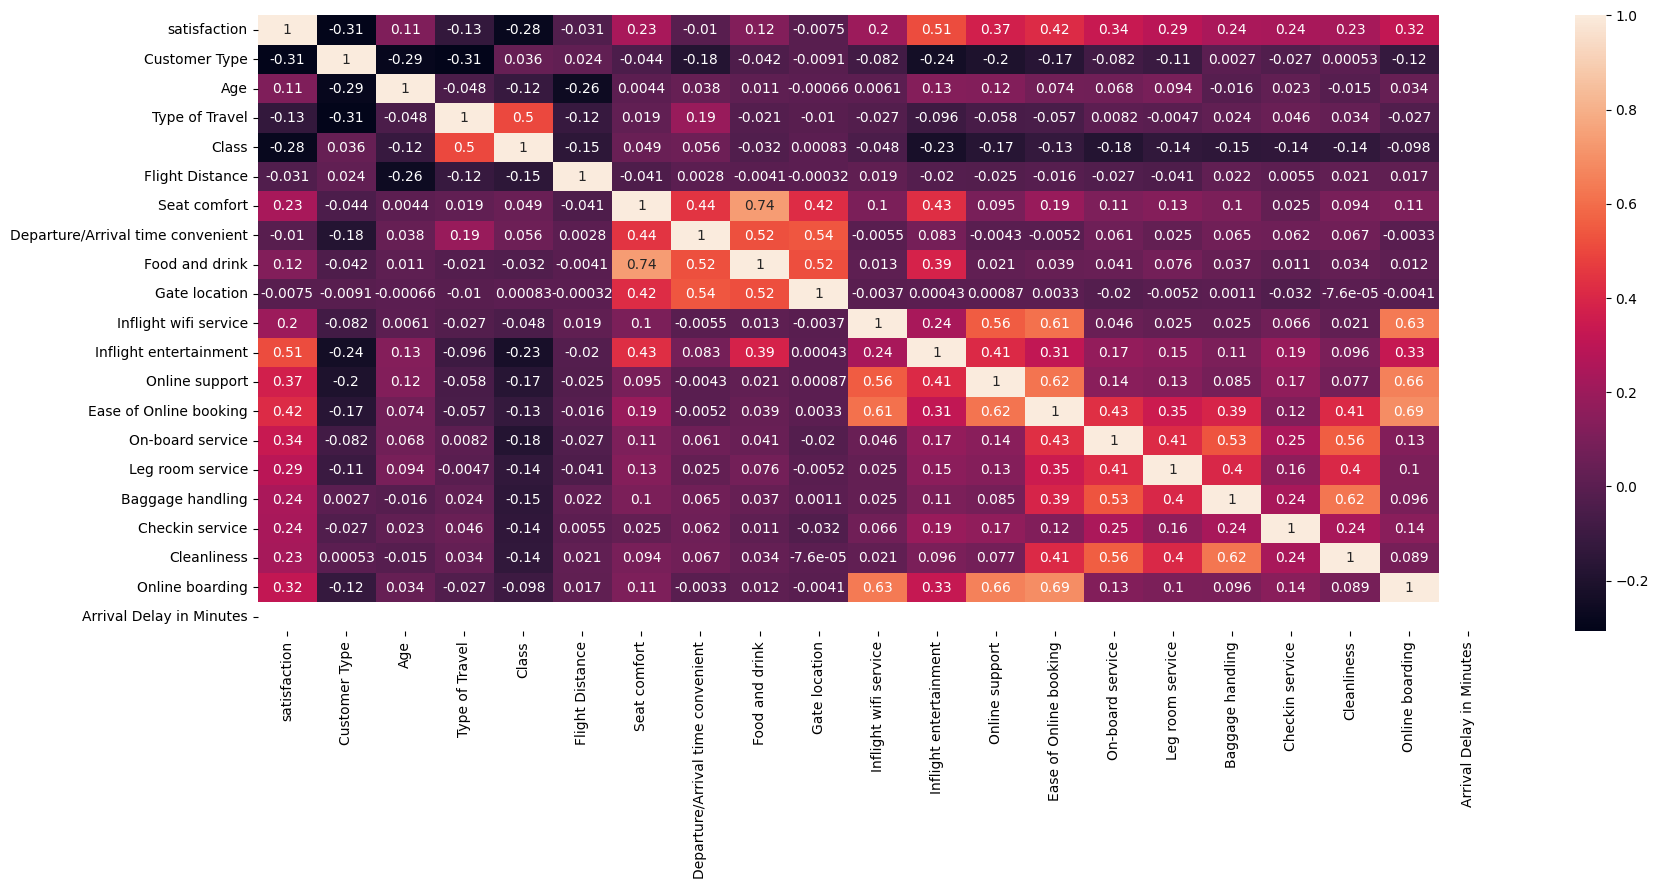

In [ ]:
# drop the highly correlated features
df.drop('Departure Delay in Minutes', axis=1, inplace=True)

plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# final 5 numbers summary
df.describe()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
count,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.000000,72753.00000,72753.000000,72753.000000,72753.000000,72753.0
mean,0.586684,0.181560,39.546960,0.312207,0.584691,1959.326502,2.878740,2.998158,2.867621,2.985403,3.279260,3.430828,3.554493,3.518123,3.511154,3.511608,3.72551,3.375022,3.748340,3.386527,0.0
std,0.492432,0.385484,15.114518,0.463397,0.618475,1018.858919,1.416652,1.536466,1.455908,1.310120,1.313372,1.346103,1.300747,1.296525,1.261767,1.290191,1.15900,1.254253,1.148139,1.293357,0.0
min,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,27.000000,0.000000,0.000000,1336.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.00000,3.000000,3.000000,2.000000,0.0
50%,1.000000,0.000000,40.000000,0.000000,1.000000,1902.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,3.000000,4.000000,4.000000,0.0
75%,1.000000,0.000000,51.000000,1.000000,1.000000,2525.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.00000,4.000000,5.000000,4.000000,0.0
max,1.000000,1.000000,85.000000,1.000000,2.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,0.0


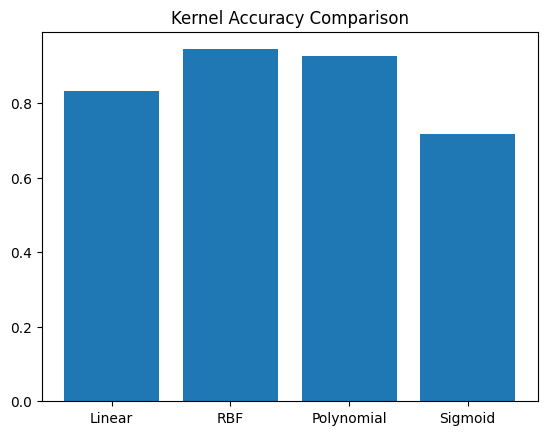

In [ ]:
accuracy = np.array([0.8335778824619662, 0.9447061549154375,
                     0.9259402270445595, 0.7183952428758977])
label = np.array(["Linear", "RBF", "Polynomial", "Sigmoid"])

plt.title("Kernel Accuracy Comparison")
plt.bar(label, accuracy)
plt.show()

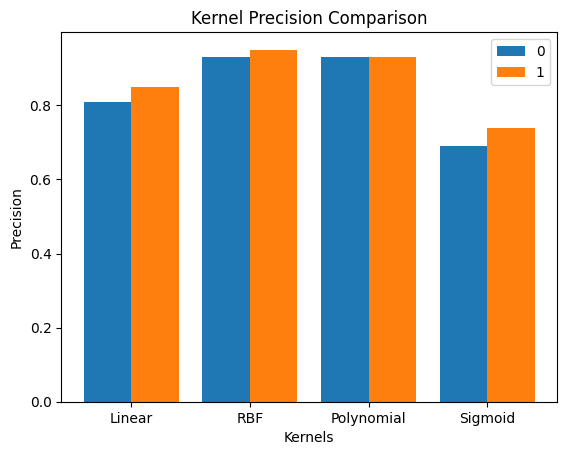

In [ ]:
precision_zero = np.array([0.81, 0.93, 0.93, 0.69])
precision_one = np.array([0.85, 0.95, 0.93, 0.74])
x_axis = np.arange(len(label))

plt.title("Kernel Precision Comparison")
plt.xticks(x_axis, label)
plt.bar(x_axis - 0.2, precision_zero, 0.4, label = '0')
plt.bar(x_axis + 0.2, precision_one, 0.4, label = '1')
plt.xlabel("Kernels")
plt.ylabel("Precision")
plt.legend()
plt.show()

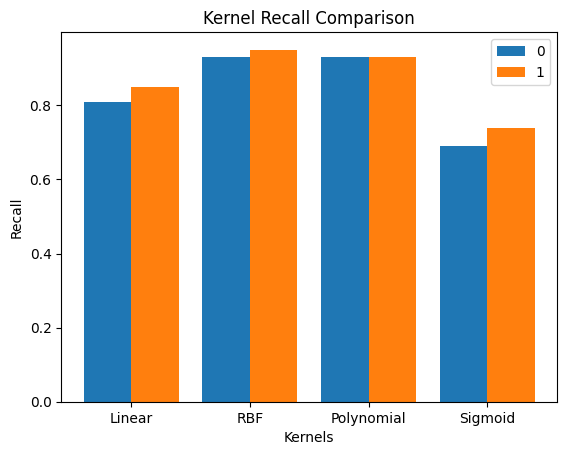

In [ ]:
recall_zero = np.array([0.83, 0.95, 0.91, 0.69])
recall_one = np.array([0.84, 0.94, 0.94, 0.74])
x_axis = np.arange(len(label))

plt.title("Kernel Recall Comparison")
plt.xticks(x_axis, label)
plt.bar(x_axis - 0.2, precision_zero, 0.4, label = '0')
plt.bar(x_axis + 0.2, precision_one, 0.4, label = '1')
plt.xlabel("Kernels")
plt.ylabel("Recall")
plt.legend()
plt.show()

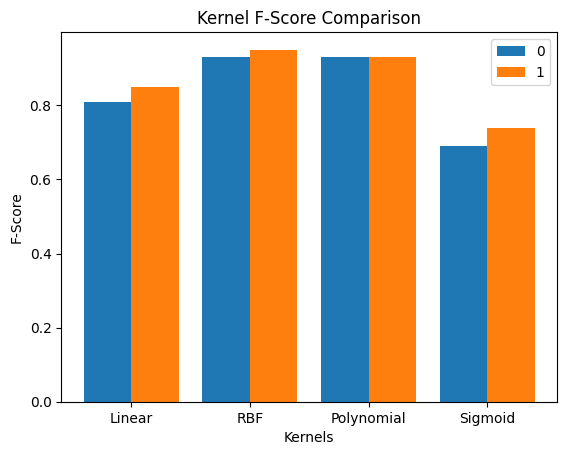

In [ ]:
f_zero = np.array([0.82, 0.95, 0.92, 0.69])
f_one = np.array([0.85, 0.94, 0.93, 0.74])
x_axis = np.arange(len(label))

plt.title("Kernel F-Score Comparison")
plt.xticks(x_axis, label)
plt.bar(x_axis - 0.2, precision_zero, 0.4, label = '0')
plt.bar(x_axis + 0.2, precision_one, 0.4, label = '1')
plt.xlabel("Kernels")
plt.ylabel("F-Score")
plt.legend()
plt.show()